(-2.1900105075514253,
 0.20989102341991983,
 0,
 2106,
 {'1%': -3.4334588739173006,
  '5%': -2.8629133710702983,
  '10%': -2.5675011176676956},
 12502.970632991975)

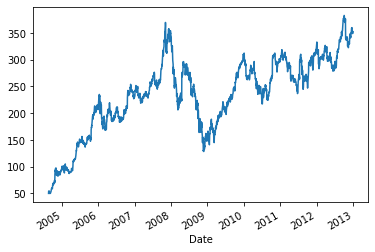

In [33]:
## https://www.quantstart.com/articles/Basics-of-Statistical-Mean-Reversion-Testing/
# Import the Time Series library
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt

# Import Datetime and the Pandas DataReader
from datetime import datetime
from pandas_datareader.data import DataReader

# Download the Google OHLCV data from 1/1/2000 to 1/1/2013
goog = DataReader("GOOG", "yahoo", datetime(2000,1,1), datetime(2013,1,1))
goog['Adj Close'].plot()

# Output the results of the Augmented Dickey-Fuller test for Google
# with a lag order value of 1
ts.adfuller(goog['Adj Close'], 1)

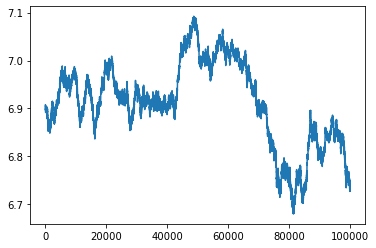

Hurst(GBM):   0.49726263966944667
Hurst(MR):    4.7556275531387335e-05
Hurst(TR):    0.9566504334311425
Hurst(GOOG):  0.5078801228123312


In [34]:
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn

def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)

    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

# Create a Gometric Brownian Motion, Mean-Reverting and Trending Series
# for geometric Brownian motion, see https://www.quantstart.com/articles/Geometric-Brownian-Motion/
gbm = log(cumsum(randn(100000))+1000)
mr = log(randn(100000)+1000)
tr = log(cumsum(randn(100000)+1)+1000)

# Output the Hurst Exponent for each of the above series
# and the price of Google (the Adjusted Close price) for 
# the ADF test given above in the article
print("Hurst(GBM):   %s" % hurst(gbm))
print("Hurst(MR):    %s" % hurst(mr))
print("Hurst(TR):    %s" % hurst(tr))

# Assuming you have run the above code to obtain 'goog', .to_numpy() convert DataFrame to np.array
print("Hurst(GOOG):  %s" % hurst(goog['Adj Close'].to_numpy()))